In [28]:
import os
import requests
import shutil
import cv2
from PIL import Image
import numpy

In [39]:
url = 'https://icinfo.immigration.gov.tw/NIL_WEB/ValidateCode.ashx'
response = requests.get(url,stream=True ,verify=False)
with open('img.png', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

C:\Users\Hsien\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [40]:
pil_image = Image.open('img.png')
pil_image

In [41]:
open_cv_image = numpy.array(pil_image) 
open_cv_image.shape

(22, 62)

In [42]:
open_cv_image

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [250, 138,   0, ..., 251, 251, 251],
       [251, 250,  84, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251]], dtype=uint8)

In [43]:
import cv2
ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)

In [44]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ..., 255, 255, 255],
       [255, 255,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [45]:
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [46]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [50]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print(x,y,w,h)
    if y>0 and w >= 6 and w <= 50 and h >= 5:
        ary.append((x,y,w,h) )

0 0 62 22
0 6 14 16
6 9 4 5
12 6 15 16
24 8 13 12
34 6 14 16


In [51]:
ary

[(0, 6, 14, 16), (12, 6, 15, 16), (24, 8, 13, 12), (34, 6, 14, 16)]

In [ ]:
## Create資料夾

In [31]:
import os
dest = 'digits/'
#os.mkdir(dest)

In [32]:
#for i in range(0,10):
#    os.mkdir(dest+str(i))

Populating the interactive namespace from numpy and matplotlib


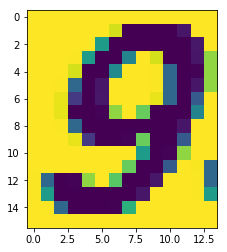

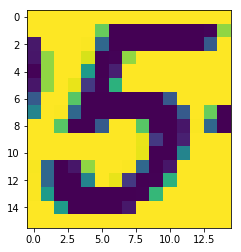

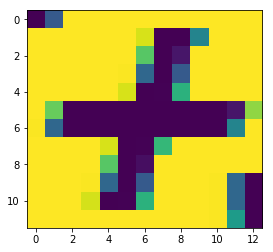

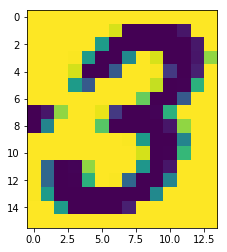

In [49]:
%pylab inline
from matplotlib import pyplot as plt
data = []
for idx, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(os.path.join(dest, '{}.jpg'.format(idx)), dpi=100)

In [56]:
def getCaptcha(run):
    url = 'https://icinfo.immigration.gov.tw/NIL_WEB/ValidateCode.ashx'
    response = requests.get(url,stream=True ,verify=False)
    with open('img.png', 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response
    
    pil_image = Image.open('img.png').convert('L')
    open_cv_image = numpy.array(pil_image) 
    ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
    ary = []
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        #print(x,y,w,h)
        if y>0 and w >= 6 and w <= 50 and h >= 5:
            ary.append((x,y,w,h) )
    data = []
    for idx, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        roi = open_cv_image[y:y+h, x:x+w]
        thresh = roi.copy()
        #plt.imshow(thresh)
        plt.savefig(os.path.join(dest, '{}_{}.jpg'.format(run,idx)), dpi=100)

C:\Users\Hsien\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Hsien\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Hsien\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Hsien\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTT

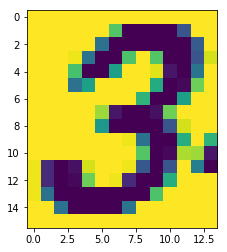

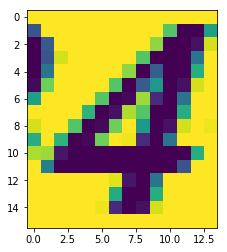

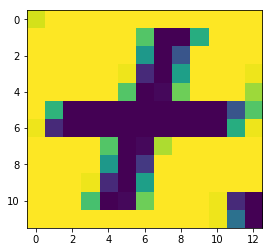

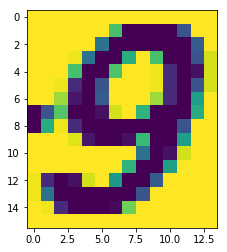

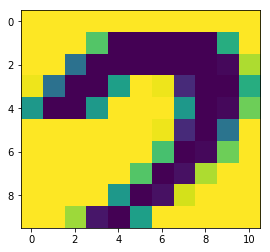

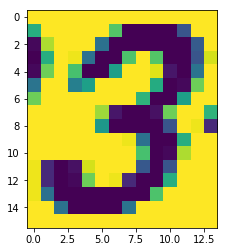

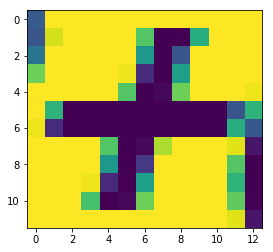

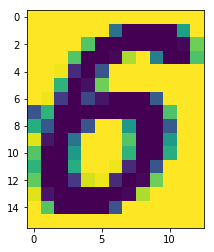

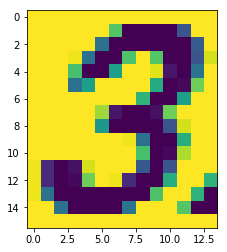

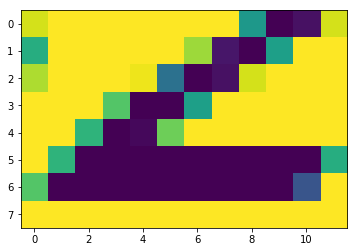

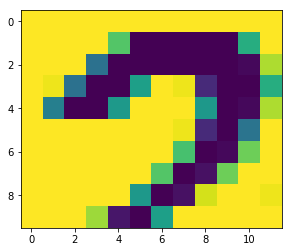

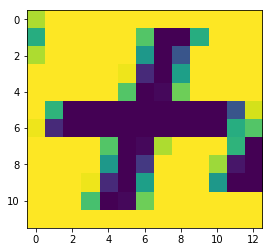

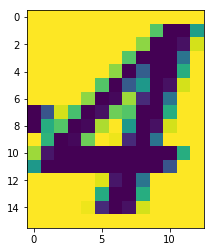

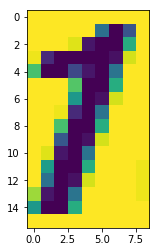

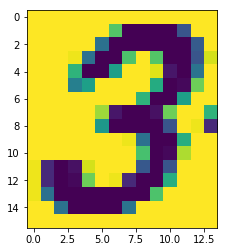

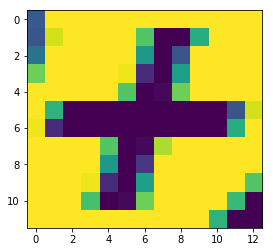

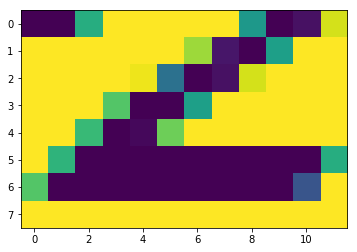

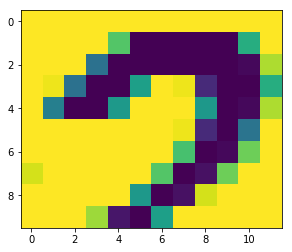

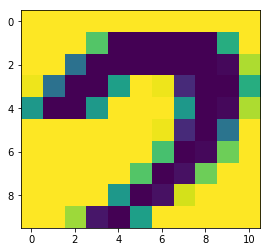

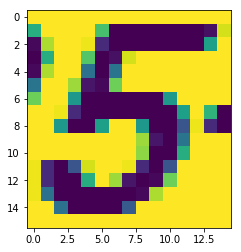

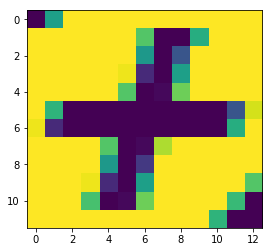

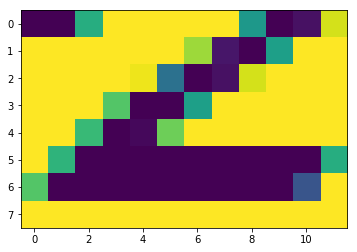

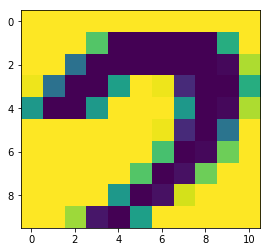

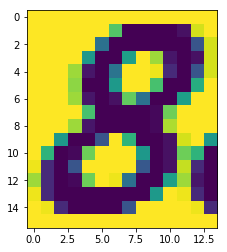

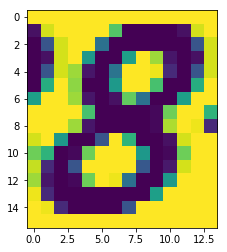

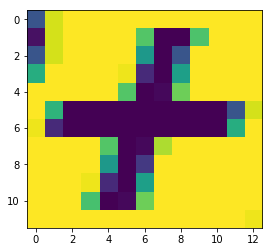

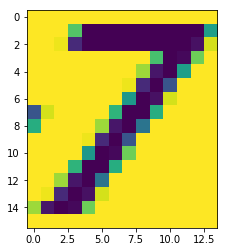

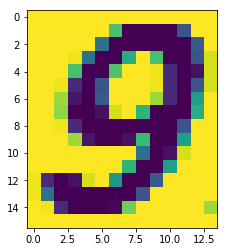

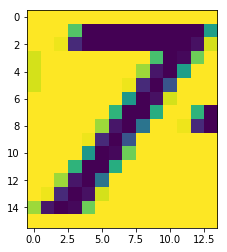

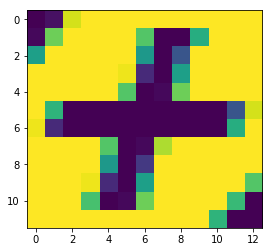

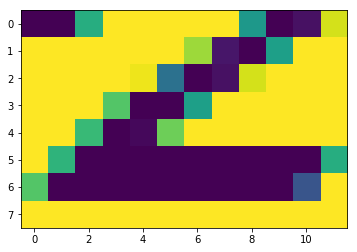

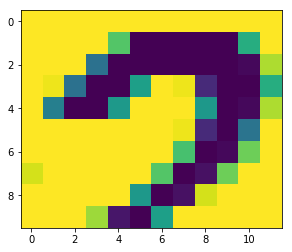

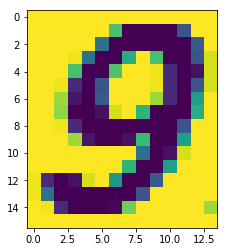

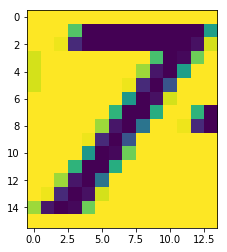

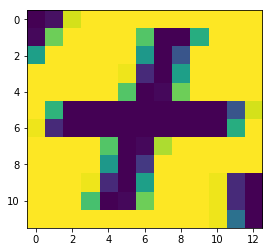

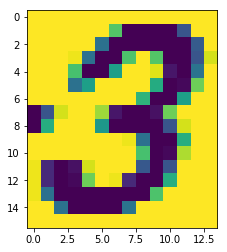

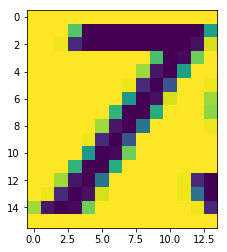

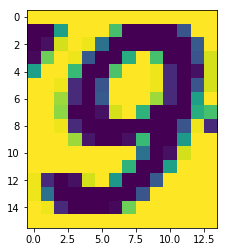

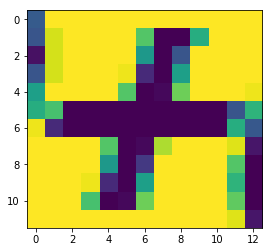

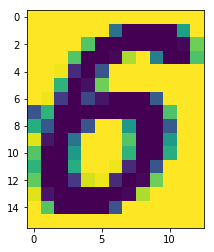

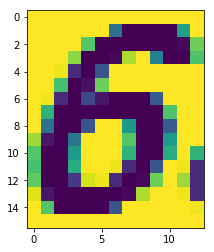

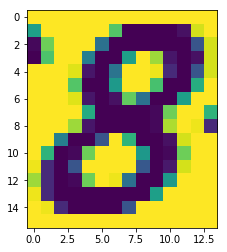

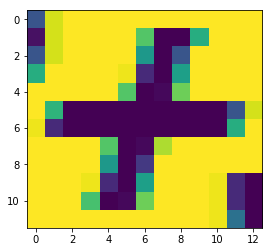

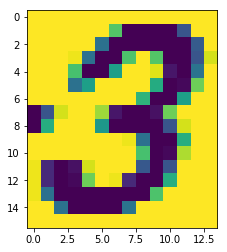

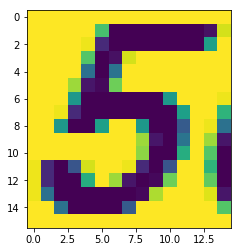

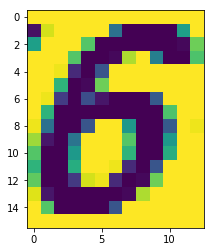

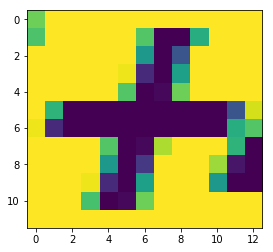

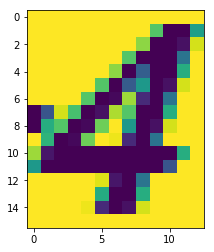

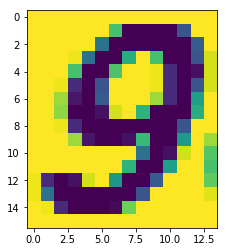

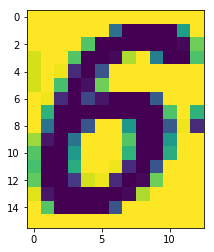

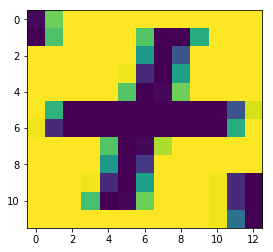

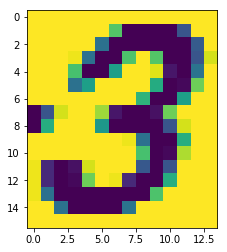

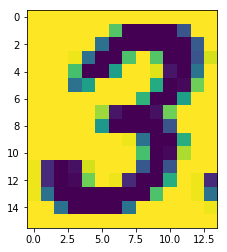

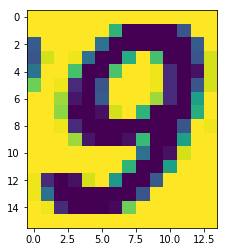

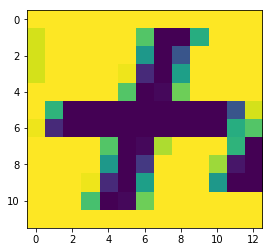

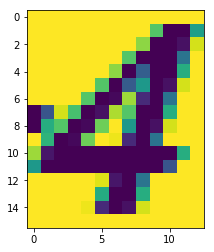

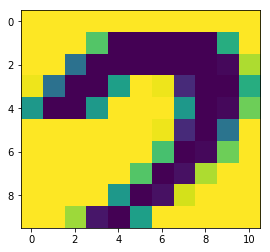

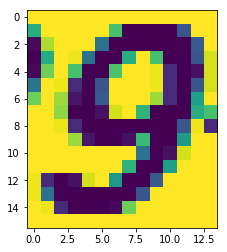

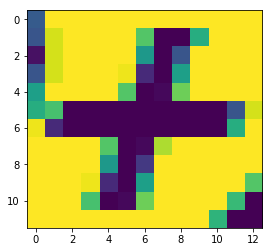

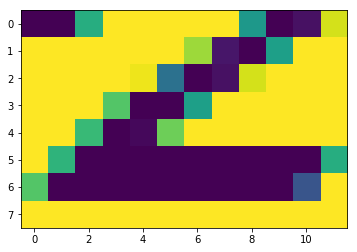

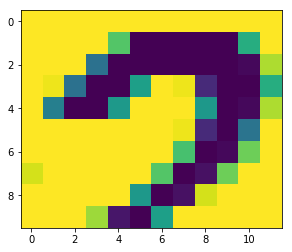

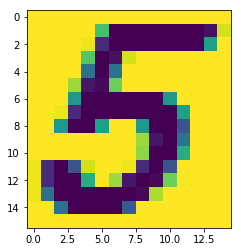

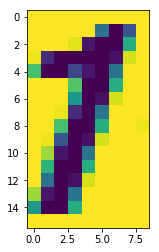

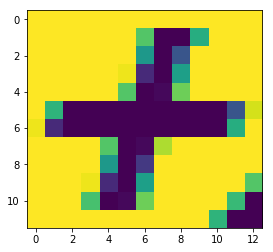

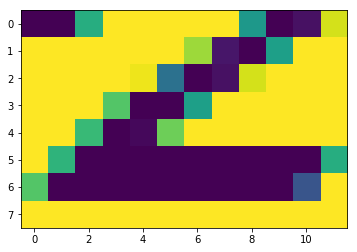

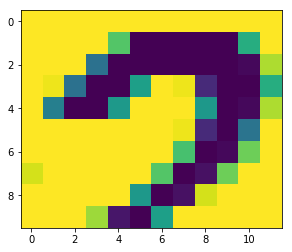

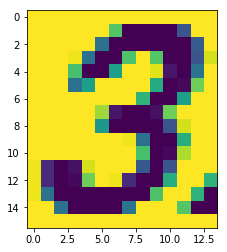

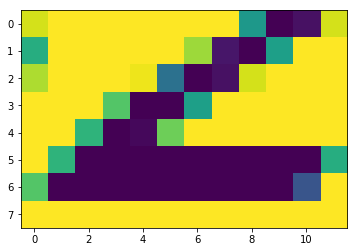

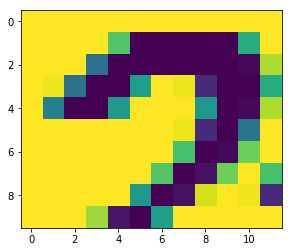

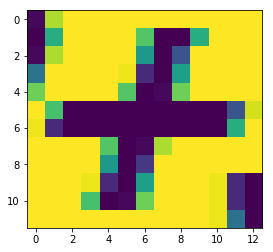

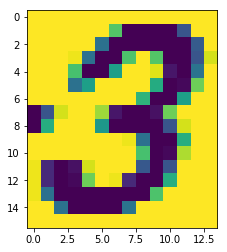

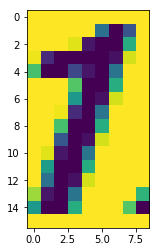

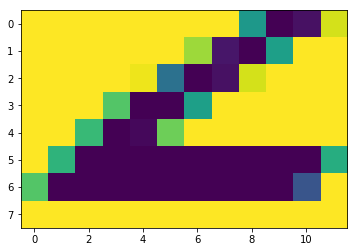

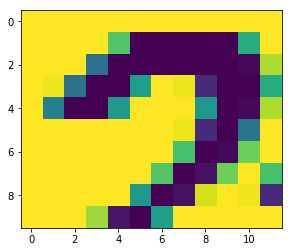

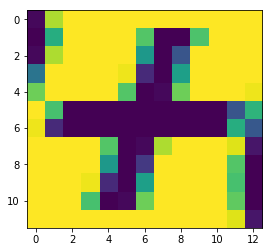

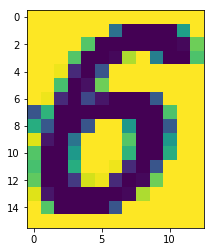

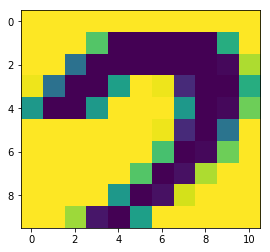

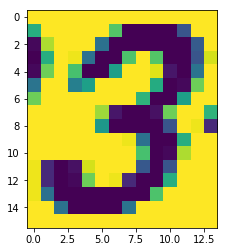

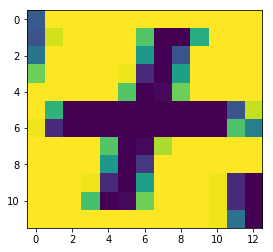

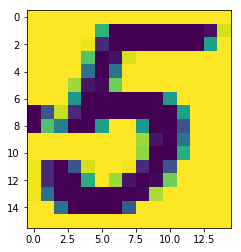

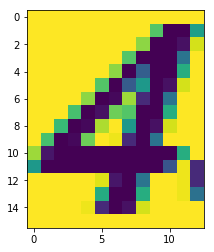

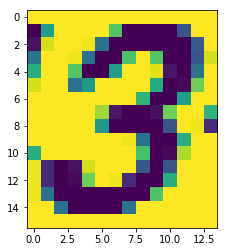

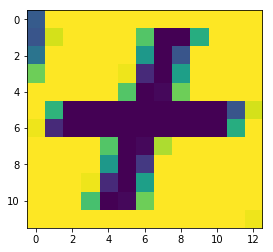

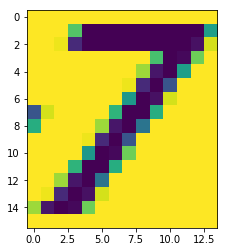

In [58]:
for i in range(1,20):
    getCaptcha(i)

In [70]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (60, 40,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [75]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [78]:

training_set = train_datagen.flow_from_directory(
    'digits/', target_size = (60, 40),
     batch_size = 10,
     class_mode = 'categorical')

Found 85 images belonging to 10 classes.


In [80]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=10,
                         steps_per_epoch = 10,
                         verbose = 1)

Epoch 1/10
 2/10 [=====>........................] - ETA: 0s - loss: 0.1862 - acc: 0.9500

C:\Users\Hsien\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\Hsien\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=10, verbose=1, epochs=10, validation_steps=10)`
  """


10/10 [==============================] - 1s 54ms/step - loss: 0.1953 - acc: 0.9598
Epoch 2/10
10/10 [==============================] - 0s 49ms/step - loss: 0.1768 - acc: 0.9397
Epoch 3/10
10/10 [==============================] - 0s 50ms/step - loss: 0.1401 - acc: 0.9498
Epoch 4/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0956 - acc: 0.9900
Epoch 5/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0730 - acc: 0.9799
Epoch 6/10
10/10 [==============================] - 1s 52ms/step - loss: 0.0996 - acc: 0.9598
Epoch 7/10
10/10 [==============================] - 0s 49ms/step - loss: 0.0677 - acc: 0.9798
Epoch 8/10
10/10 [==============================] - 1s 52ms/step - loss: 0.0830 - acc: 0.9699
Epoch 9/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0480 - acc: 0.9799
Epoch 10/10
10/10 [==============================] - 1s 52ms/step - loss: 0.0956 - acc: 0.9799


C:\Users\Hsien\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


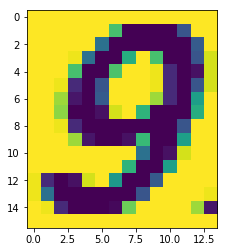

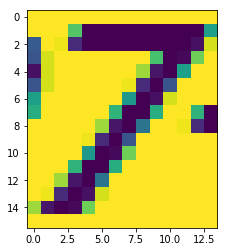

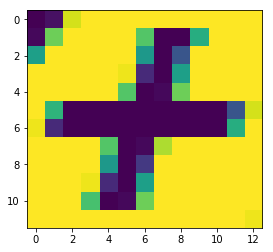

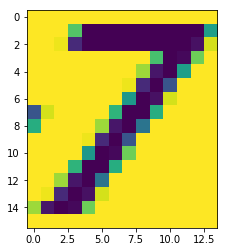

In [81]:
getCaptcha(1)

In [86]:
from keras.preprocessing import image
for f in os.listdir('digits/predict'):
    fig = plt.figure()
    test_image = image.load_img('digits/predict/'+f, target_size= (60,40))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    print(f, classifier.predict_classes(test_image))
    #plt.imshow(img)

1_0.jpg [9]
1_1.jpg [7]
1_2.jpg [0]
1_3.jpg [7]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [87]:
classifier.save('captchabreak.hd5')